# The first neural network

In this notebook, the first neural network will be build for classifying handwritten digits loaded from MNIST. 

See pages 27-30, 53 of "<strong>Deep Learning with Python</strong>" by Francois Chollet (2018). 

## Loading MNIST data (Handwritten digits)

In [0]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Let us load the training and test dataset from MNIST which provides the handwritten digits.

In [53]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train_images shape: {}".format(train_images.shape))
print("train_labels shape: {}".format(train_labels.shape))
print("test_images shape: {}".format(test_images.shape))
print("test_labels shape: {}".format(test_labels.shape))

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


The labels are numbers ranging from 0 to 9. The first 10 images and labels in the training dataset will be shown in the next cell.

The first 10 labels in train_labels: [5 0 4 1 9 2 1 3 1 4]


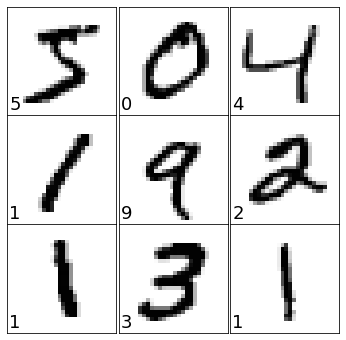

In [54]:
print("The first 10 labels in train_labels: {}".format(train_labels[:10]))

plt.rcParams["font.size"] = 18
plt.figure(figsize=(6,6))

for j in range(9):
    plt.subplot(3,3, j+1)
    plt.imshow(train_images[j],cmap=plt.cm.binary)
    plt.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    plt.text(0,26,'%d'%train_labels[j])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In the next cell, the data is reshaped and normalized.

In [0]:
train_images=train_images.reshape((60000, 28*28)) # change the shape
train_images=train_images.astype('float32')/255 # normalization

test_images=test_images.reshape((10000, 28*28)) # change the shape
test_images=test_images.astype('float32')/255 # normalization

The one-hot encoding will be performed for train_labels and test_labels in the next cell.

In [32]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("train_labels shape: ".format(train_labels.shape))
print("test_labels shape: ".format(test_labels.shape))

print("The first 10 rows in the train_labels:\n{}".format(train_labels[:10]))

train_labels shape: 
test_labels shape: 
The first 10 rows in the train_labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Neural network

The neural network that we will build in the next cell consists of two densely connected neural layers (Dense layers). The output layer is a 10-way softmax layer that returns an array of 10 probabilities.

In [36]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [49]:
print("The numebr of parameters for weights (first layer): ", 28*28*512)
print("The numebr of all parameters for weights (first layer): ", 28*28*512+512)

print("The numebr of parameters for weights (second layer): ", 10*512)
print("The numebr of all parameters for weights (second layer): ", 10*512+10)

The numebr of parameters for weights (first layer):  401408
The numebr of all parameters for weights (first layer):  401920
The numebr of parameters for weights (second layer):  5120
The numebr of all parameters for weights (second layer):  5130


In [50]:
network.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
                
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0314 - acc: 0.9901
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0233 - acc: 0.9930
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0180 - acc: 0.9948
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0146 - acc: 0.9955
Epoch 5/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0113 - acc: 0.9968


In [40]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_loss", test_loss)
print("test_acc: ", test_acc)

10000/10000 [==============================] - 0s 50us/step
test_loss 0.0654668643877958
test_acc:  0.9808


0.0654668643877958